# Load MNIST Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d0 = pd.read_csv('train.csv')
d0.dropna(inplace=True)

In [3]:
print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.

In [4]:
print(d.shape)
print(l.shape)

(9742, 784)
(9742,)


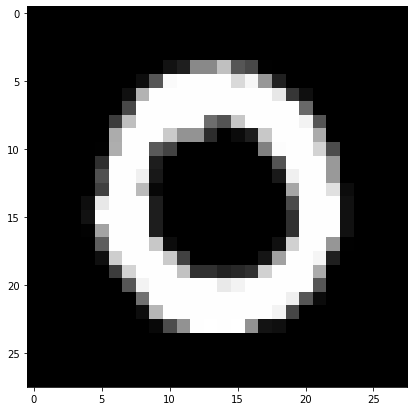

0


In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

#  2D Visualization using PCA 

In [6]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (9742, 784)


In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(9742, 784)


In [8]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [9]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(781,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 3)
Updated shape of eigen vectors =  (3, 784)


In [10]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (3, 784) X (784, 9742)  =  (3, 9742)


In [11]:
new_coordinates

array([[-3.90440339, -1.0340882 , -2.31638835, ..., -4.74764021,
         2.66558892, -0.54479573],
       [-5.35340739,  6.80069788, -2.00664532, ...,  0.59244851,
         0.8391954 , -1.87396038],
       [-4.97961623, 18.96580131, -7.54414381, ..., -3.39008077,
        -7.5915655 , -7.10008896]])

In [13]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal","3nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  3nd_principal  label
0      -3.904403      -5.353407      -4.979616    1.0
1      -1.034088       6.800698      18.965801    0.0
2      -2.316388      -2.006645      -7.544144    1.0
3      -2.494959       5.640714      -0.754260    4.0
4      -0.632567       7.249430      26.239025    0.0


In [14]:
dataframe.shape

(9742, 4)

In [15]:
import pandas as pd
df=pd.DataFrame()
df['1st']=[-5.558661,-5.043558,6.193635 ,19.305278]
df['2nd']=[-1.558661,-2.043558,2.193635 ,9.305278]
df['label']=[1,2,3,4]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


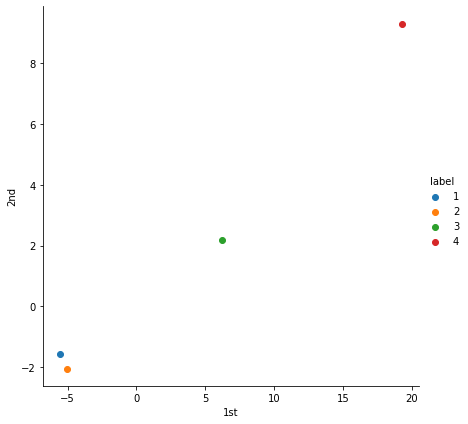

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(df, hue="label", size=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

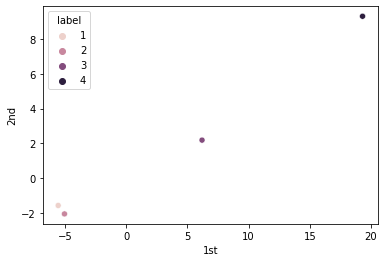

In [17]:
sn.scatterplot(x="1st",y="2nd",hue="label",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


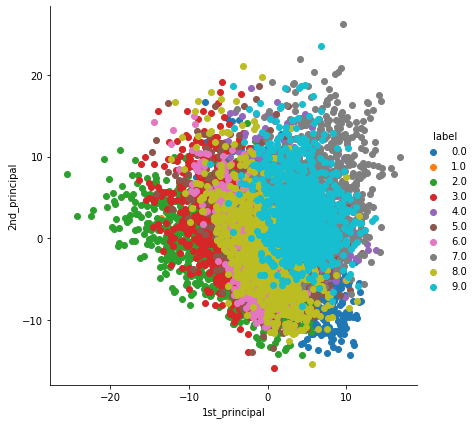

In [18]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [19]:
dataframe.head()

,1st_principal,2nd_principal,3nd_principal,label
0,-3.904403,-5.353407,-4.979616,1.0
1,-1.034088,6.800698,18.965801,0.0
2,-2.316388,-2.006645,-7.544144,1.0
3,-2.494959,5.640714,-0.754260,4.0
4,-0.632567,7.249430,26.239025,0.0


In [20]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(dataframe, x='1st_principal', y='2nd_principal', z='3nd_principal',
              color='label', size='label', size_max=18,
              symbol='label',opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

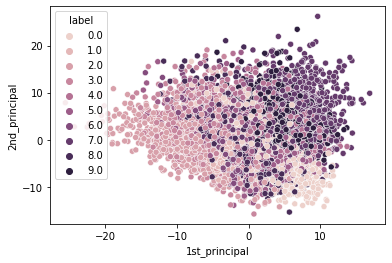

In [21]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

# PCA using Scikit-Learn

In [22]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [23]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (9742, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



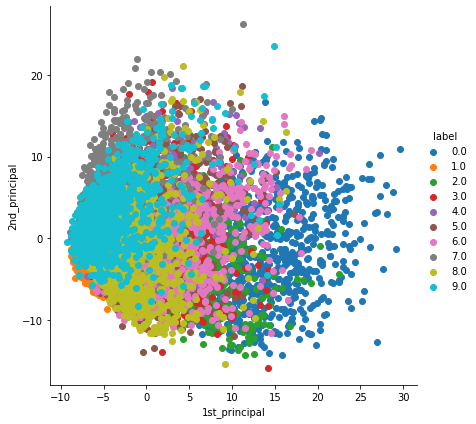

In [24]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

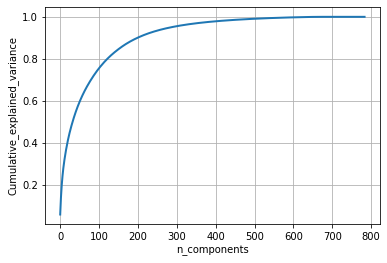

In [25]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Scikit-Learn

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



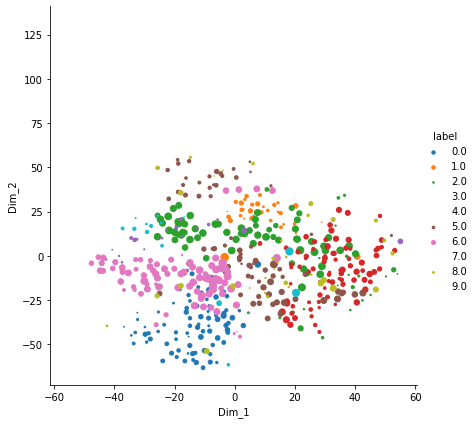

In [39]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=3, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# # creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Dim_3", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2','Dim_3').add_legend()
plt.show()

In [28]:
# tsne_data  del later

array([[ 3.53261604e+01, -1.59153193e-02, -2.72978859e+01,
         1.00000000e+00],
       [-7.31464148e+00, -5.03143272e+01,  1.20731163e+01,
         0.00000000e+00],
       [ 1.09929886e+01,  2.56285152e+01,  7.52565432e+00,
         1.00000000e+00],
       ...,
       [-1.18171616e+01,  1.79431438e+01, -3.40532188e+01,
         9.00000000e+00],
       [-3.53838272e+01, -9.60187244e+00,  3.57966690e+01,
         6.00000000e+00],
       [-2.26713028e+01,  1.43388224e+01,  2.69889593e+00,
         4.00000000e+00]])

In [38]:
# # creating a new data frame which help us in ploting the result data del later
# tsne_data = np.vstack((tsne_data.T, labels_1000)).T
# tsne_data

array([[-72.26216888,  38.91920471,   1.        ,   1.        ],
       [ 66.0681839 , -37.72475815,   0.        ,   0.        ],
       [ -2.55794597,  72.2179184 ,   1.        ,   1.        ],
       ...,
       [ 21.39466858, -74.8900528 ,   9.        ,   9.        ],
       [ 90.24655151, -15.04304981,   6.        ,   6.        ],
       [-25.65978432, -60.21417618,   4.        ,   4.        ]])

In [41]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","Dim_3", "label"))

In [42]:
import plotly.express as px
# df = px.data.iris()
fig = px.scatter_3d(tsne_df, x='Dim_1', y='Dim_2', z='Dim_3',
              color='label', size='label', size_max=18,
              symbol='label',opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



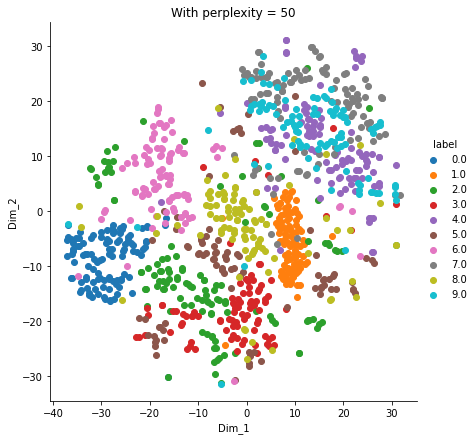

In [33]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



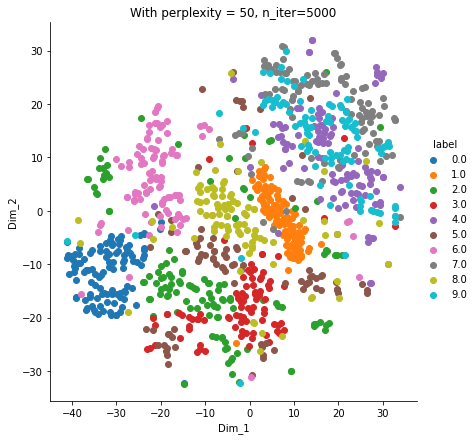

In [34]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



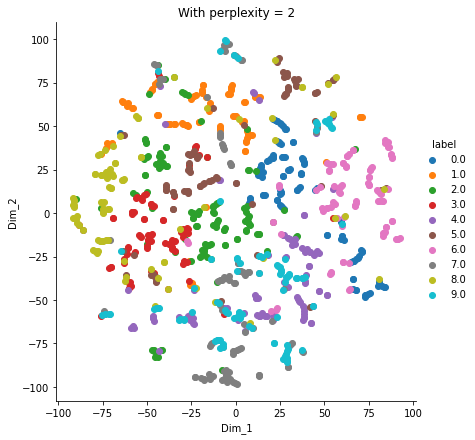

In [35]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()